# Optimizitation Project - Index Tracking & Enhanced Indexation

### Package and Data loading

In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp39-cp39-macosx_12_0_arm64.whl (11.1 MB)
  Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from typing import Dict, List, Optional
import matplotlib.pyplot as plt
import seaborn as sns


We selescted the CAC 40 as the reference index, the index contains the 40 largest comapanies on teh Paris stock exchange based on their market capitalisation.

In [3]:
INDEX_CONSTITUENTS = {
    'CAC40': {
        'ticker': '^FCHI',
        'constituents': [
            'AIR.PA', 'AI.PA', 'MT.AS', 'CS.PA', 'BNP.PA', 'EN.PA', 
            'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA', 'DSY.PA', 'ENGI.PA',
            'EL.PA', 'ERF.PA', 'RMS.PA', 'KER.PA', 'LR.PA', 'OR.PA',
            'MC.PA', 'ML.PA', 'ORA.PA', 'RI.PA', 'PUB.PA', 'RNO.PA',
            'SAF.PA', 'SGO.PA', 'SAN.PA', 'SU.PA', 'GLE.PA', 'STLAP.PA',
            'STMPA.PA', 'TEP.PA', 'HO.PA', 'FP.PA', 'URW.AS', 'VIE.PA',
            'DG.PA', 'VIV.PA', 'WLN.PA', 'ALO.PA'
        ]
    }
}

The function below uses yahoo finance native python package to load daily financial data about the index and its constituents, such as the opening and closing price, the volume of transaction, the high and low.

In [4]:
def get_index_data(index_name: str,
                   period: str = '1y',
                   constituents: Optional[List[str]] = None) -> pd.DataFrame:
    """
    Fetch daily OHLCV data for an index and its constituents, and return a single DataFrame:
    columns = ['name', 'date', 'open', 'high', 'low', 'close', 'volume']
    """
    index_name = index_name.upper()

    if index_name not in INDEX_CONSTITUENTS:
        raise ValueError(f"Index '{index_name}' not supported. "
                         f"Available: {list(INDEX_CONSTITUENTS.keys())}")

    index_ticker = INDEX_CONSTITUENTS[index_name]['ticker']
    if constituents is None:
        constituents = INDEX_CONSTITUENTS[index_name]['constituents']

    all_rows = []

    def fetch_and_append(ticker, label):
        try:
            df = yf.Ticker(ticker).history(period=period)[['Open','High','Low','Close','Volume']]
            df = df.reset_index().rename(columns=str.lower)
            df['name'] = label
            all_rows.append(df[['name','date','open','high','low','close','volume']])
            print(f"✓ {label}")
        except Exception as e:
            print(f"✗ {label} - {e}")

    # Index itself
    print(f"Fetching index: {index_name}")
    fetch_and_append(index_ticker, index_name)

    # Constituents
    print(f"Fetching {len(constituents)} constituents...")
    for t in constituents:
        fetch_and_append(t, t)

    # Combine all
    big_df = pd.concat(all_rows, ignore_index=True)
    print(f"\nFinal dataset: {big_df['name'].nunique()} assets, {len(big_df):,} rows")

    return big_df


In [5]:
value_df = get_index_data('CAC40', period='1y')

Fetching index: CAC40
✓ CAC40
Fetching 40 constituents...
✓ AIR.PA
✓ AI.PA
✓ MT.AS
✓ CS.PA
✓ BNP.PA
✓ EN.PA
✓ CAP.PA
✓ CA.PA
✓ ACA.PA
✓ BN.PA
✓ DSY.PA
✓ ENGI.PA
✓ EL.PA
✓ ERF.PA
✓ RMS.PA
✓ KER.PA
✓ LR.PA
✓ OR.PA
✓ MC.PA
✓ ML.PA
✓ ORA.PA
✓ RI.PA
✓ PUB.PA
✓ RNO.PA
✓ SAF.PA
✓ SGO.PA
✓ SAN.PA
✓ SU.PA
✓ GLE.PA
✓ STLAP.PA
✓ STMPA.PA
✓ TEP.PA
✓ HO.PA


$FP.PA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


✓ FP.PA


$URW.AS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


✓ URW.AS
✓ VIE.PA
✓ DG.PA
✓ VIV.PA
✓ WLN.PA
✓ ALO.PA

Final dataset: 39 assets, 9,984 rows


In [6]:
# We add a column daily return calcualting the difference in % between the closing price of the day d and the closing price at d-1

value_df.sort_values(['name', 'date'])
value_df['daily_return_pct'] = value_df.groupby('name')['close'].pct_change() * 100
value_df


,name,date,open,high,low,close,volume,daily_return_pct
0,CAC40,2024-10-10 00:00:00+02:00,7543.399902,7563.359863,7515.899902,7541.589844,47654900.0,NaN
1,CAC40,2024-10-11 00:00:00+02:00,7530.879883,7587.520020,7504.040039,7577.890137,52952500.0,0.481335
2,CAC40,2024-10-14 00:00:00+02:00,7583.479980,7613.149902,7544.540039,7602.060059,43689100.0,0.318953
3,CAC40,2024-10-15 00:00:00+02:00,7595.060059,7601.529785,7511.240234,7521.970215,73146200.0,-1.053528
4,CAC40,2024-10-16 00:00:00+02:00,7420.850098,7511.100098,7420.850098,7492.000000,64497000.0,-0.398436
...,...,...,...,...,...,...,...,...
9979,ALO.PA,2025-10-06 00:00:00+02:00,22.309999,22.370001,21.469999,22.350000,1811806.0,-0.178647
9980,ALO.PA,2025-10-07 00:00:00+02:00,22.330000,22.940001,22.290001,22.480000,700551.0,0.581652
9981,ALO.PA,2025-10-08 00:00:00+02:00,22.320000,23.020000,22.290001,22.700001,1030198.0,0.978653
9982,ALO.PA,2025-10-09 00:00:00+02:00,22.870001,23.080000,22.469999,22.600000,1102181.0,-0.440530


### Exploratory Data Analysis (EDA)

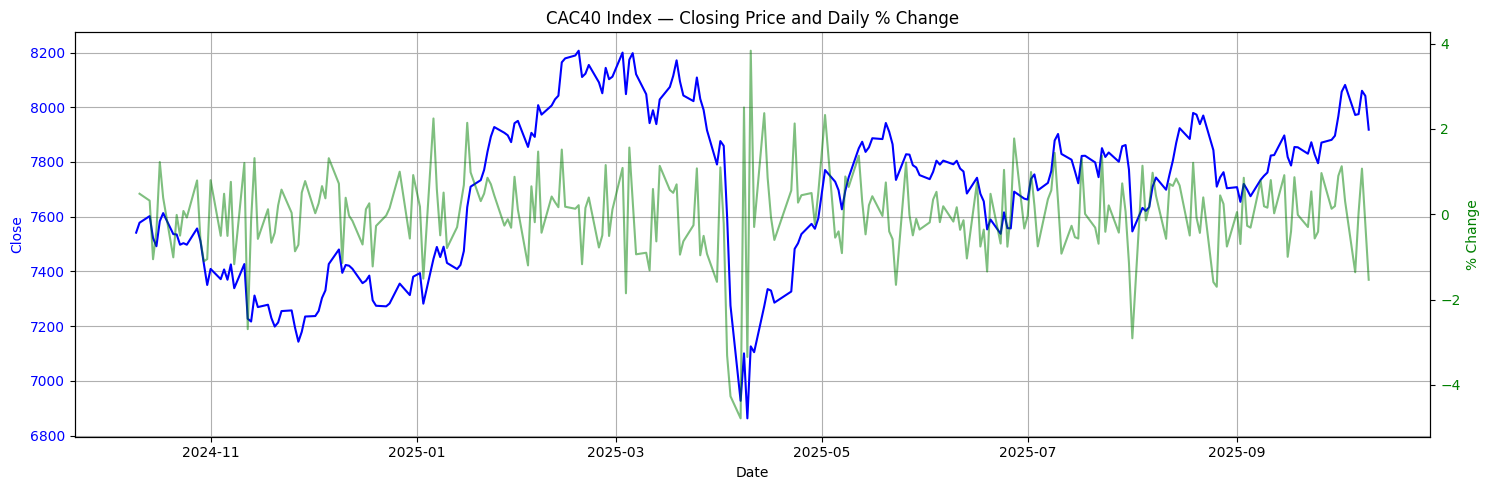

In [7]:
index_df = value_df[value_df['name'] == 'CAC40'].copy()
index_df['pct_change'] = index_df['close'].pct_change() * 100

fig, ax1 = plt.subplots(figsize=(15,5))

# Plot close price on left y-axis
ax1.plot(index_df['date'], index_df['close'], color='b', label='Close Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Close", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Plot daily % change on right y-axis
ax2 = ax1.twinx()
ax2.plot(index_df['date'], index_df['pct_change'], color='g', label='Daily % Change', alpha=0.5)
ax2.set_ylabel('% Change', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title("CAC40 Index — Closing Price and Daily % Change")
fig.tight_layout()
plt.show()


#### Correlation Matrix

name                         ACA.PA     AI.PA    AIR.PA    ALO.PA     BN.PA  \
date                                                                          
2024-10-10 00:00:00+02:00       NaN       NaN       NaN       NaN       NaN   
2024-10-11 00:00:00+02:00 -0.468468  0.447009  3.924935  0.641026  0.309019   
2024-10-14 00:00:00+02:00  0.506877  0.772924  1.655137 -1.171972  0.277262   
2024-10-15 00:00:00+02:00  0.972619 -0.162690  0.473654 -1.005412  0.768053   
2024-10-16 00:00:00+02:00  0.321088  0.034915  0.147318  6.458332 -0.274394   
...                             ...       ...       ...       ...       ...   
2025-10-06 00:00:00+02:00 -3.428920 -0.943613 -1.203634 -0.178647 -1.175507   
2025-10-07 00:00:00+02:00 -0.214263 -0.352811  0.671303  0.581652 -0.221305   
2025-10-08 00:00:00+02:00  1.104296  0.200635  1.407758  0.978653  0.443582   
2025-10-09 00:00:00+02:00  0.910192  0.977623 -0.316614 -0.440530  4.747450   
2025-10-10 00:00:00+02:00 -0.601314 -1.084801 -1.294

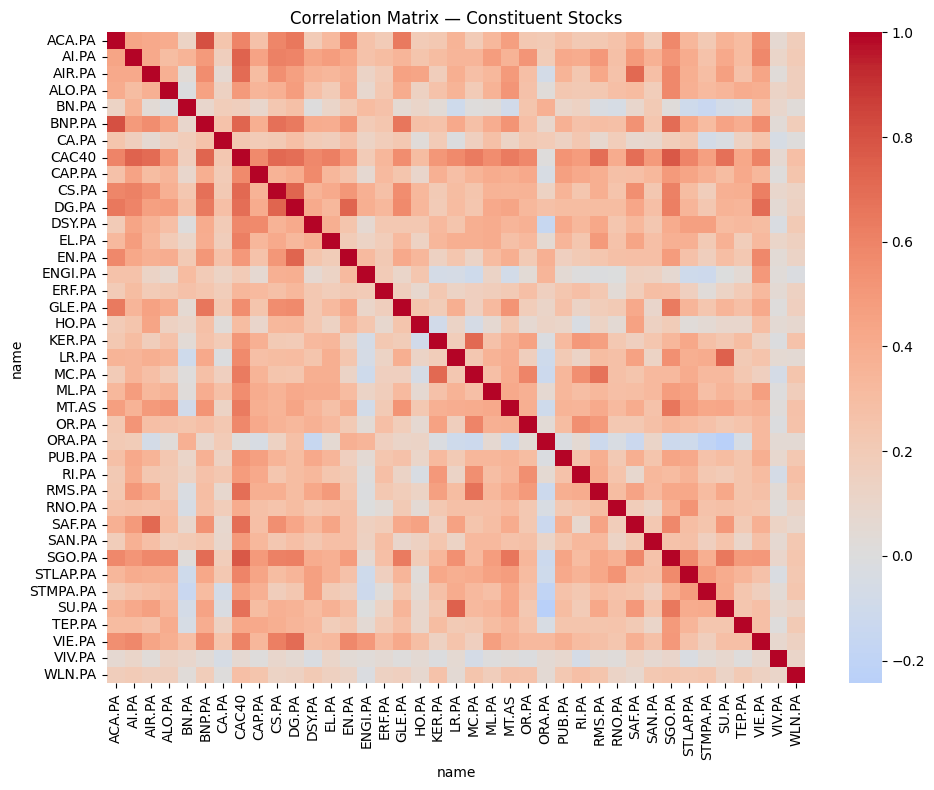

In [ ]:
pivot_close = value_df.pivot(index='date', columns='name', values='daily_return_pct')
print(pivot_close)
# Drop the index column (keep only stocks)
# pivot_stocks = pivot_close.drop(columns=['CAC40'], errors='ignore')

# Compute correlations (daily closes)
corr = pivot_close.corr()
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix — Constituent Stocks")
plt.tight_layout()
plt.show()

### R² Score (Coefficient of Determination)

The **R² score** measures how well a stock’s returns can be explained by the index returns in a linear regression. In index tracking, it quantifies how closely a stock tracks the index.


Let $(y_i)$ be the actual stock returns and $(\hat{y}\_i)$ the predicted values from a linear regression on the index returns.

The coefficient of determination is

$$
R^2 \;=\; 1 \;-\; \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Where:

- $\mathrm{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$ — **Residual Sum of Squares** (unexplained variance)  
- $\mathrm{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ — **Total Sum of Squares** (total variance)  
- $\bar{y}$ — mean of the actual values $(y_i)$

##### Interpretation

- \($R^2$ = 1\): Stock returns **perfectly track** index returns (all variation explained).  
- \($R^2$ = 0\): Stock returns are **unrelated** to index returns (no variation explained).  
- Higher $(R^2)$ → Better tracking.




In [9]:
returns = value_df.pivot(index='date', columns='name', values='close').pct_change().dropna()
index_name = 'CAC40'  # Replace as needed
index_returns = returns[index_name]
stock_names = [col for col in returns.columns if col != index_name]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
r2_results = []
for stock in stock_names:
    X = index_returns.values.reshape(-1, 1)
    y = returns[stock].values
    reg = LinearRegression().fit(X, y)
    r2 = r2_score(y, reg.predict(X))
    r2_results.append({'stock': stock, 'r2': r2})

r2_df = pd.DataFrame(r2_results)
r2_df = r2_df.sort_values('r2', ascending=False)  # Highest R² at the top
print(r2_df.head(10))  # Top 10 stocks by R²

     stock        r2
30  SGO.PA  0.600775
1    AI.PA  0.546328
5   BNP.PA  0.525033
8    CS.PA  0.514404
2   AIR.PA  0.496800
28  SAF.PA  0.479079
26  RMS.PA  0.475373
9    DG.PA  0.470542
33   SU.PA  0.466046
21   MT.AS  0.403185


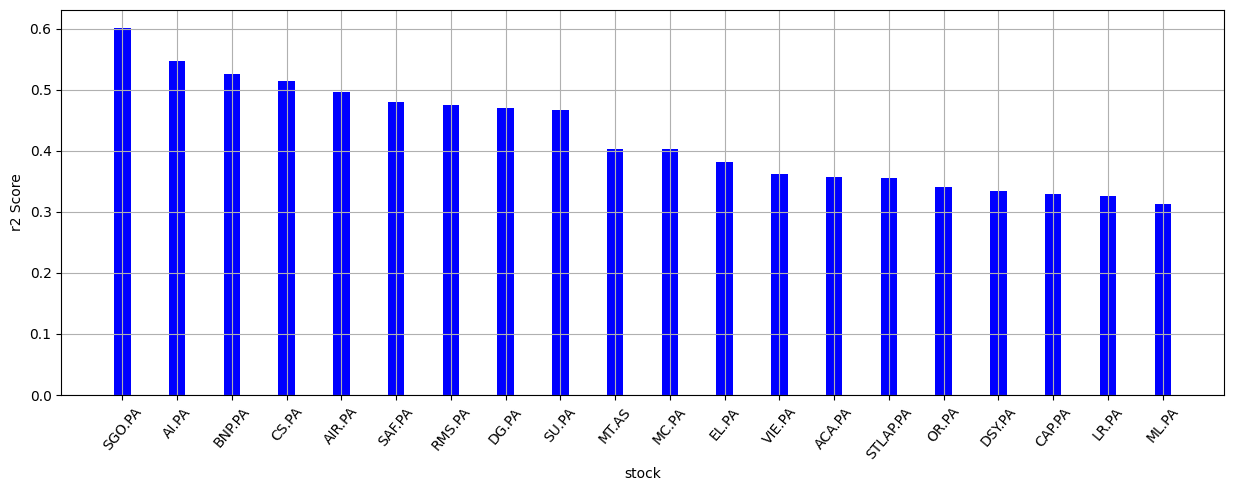

In [ ]:
r2_df = r2_df.sort_values('r2',ascending=False).head(20)
fig, ax1 = plt.subplots(figsize=(15,5))

# Plot close price on left y-axis
ax1.bar(r2_df['stock'], r2_df['r2'], color='b', label='r2 Score', width=0.3)
ax1.set_xlabel("stock")
ax1.set_ylabel("r2 Score", color='black', )
ax1.tick_params(axis='x', labelcolor='black', rotation=50)
ax1.grid(True)

Top 10 stocks by R² score:
['SGO.PA', 'AI.PA', 'BNP.PA', 'CS.PA', 'AIR.PA', 'SAF.PA', 'RMS.PA', 'DG.PA', 'SU.PA', 'MT.AS']


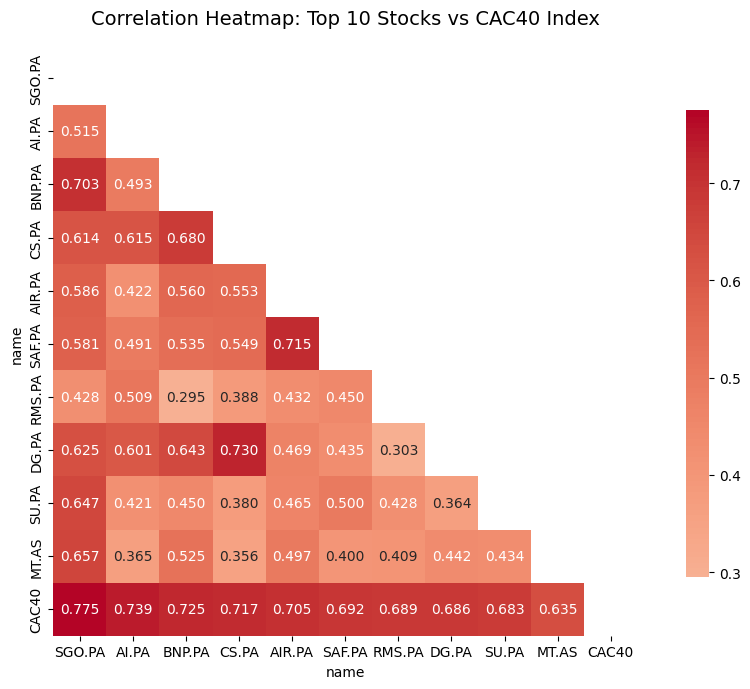

In [32]:
# Get the top 10 stocks from your R² analysis
top_10_stocks = r2_df.head(10)['stock'].tolist()
print("Top 10 stocks by R² score:")
print(top_10_stocks)

# Create correlation heatmap for top 10 stocks vs index
top_10_data = pivot_close[top_10_stocks + ['CAC40']]

# Calculate correlation matrix
corr_top10 = top_10_data.corr()

# Create heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(corr_top10, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_top10, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap: Top 10 Stocks vs CAC40 Index", fontsize=14, pad=20)
plt.tight_layout()
plt.show()



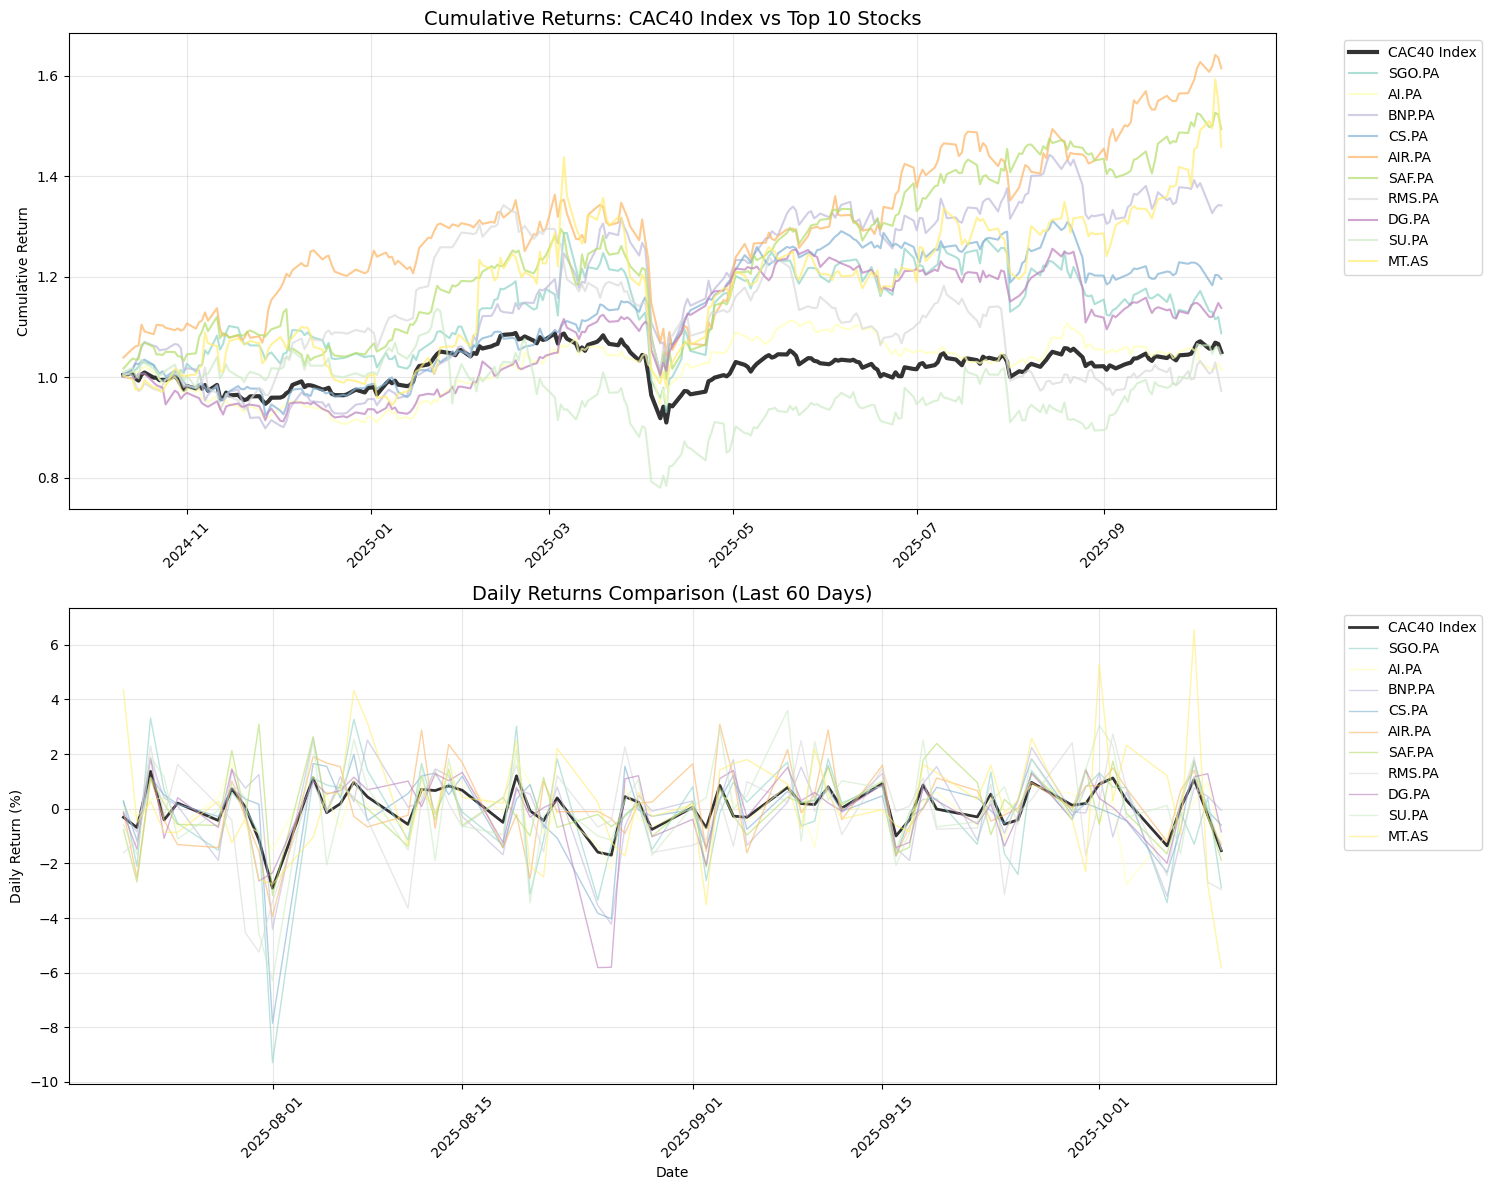

In [26]:
# Plot daily returns comparison
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Index vs Top 10 stocks cumulative returns
cumulative_returns = (1 + top_10_data / 100).cumprod()

# Plot CAC40 index
axes[0].plot(cumulative_returns.index, cumulative_returns['CAC40'], 
             linewidth=3, color='black', label='CAC40 Index', alpha=0.8)

# Plot top 10 stocks
colors = plt.cm.Set3(np.linspace(0, 1, 10))
for i, stock in enumerate(top_10_stocks):
    axes[0].plot(cumulative_returns.index, cumulative_returns[stock], 
                 linewidth=1.5, color=colors[i], label=stock, alpha=0.7)

axes[0].set_title("Cumulative Returns: CAC40 Index vs Top 10 Stocks", fontsize=14)
axes[0].set_ylabel("Cumulative Return")
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Daily returns comparison (zoomed view)
# Take last 60 days for better visibility
recent_data = top_10_data.tail(60)

# Plot CAC40 daily returns
axes[1].plot(recent_data.index, recent_data['CAC40'], 
             linewidth=2, color='black', label='CAC40 Index', alpha=0.8)

# Plot top 10 stocks daily returns
for i, stock in enumerate(top_10_stocks):
    axes[1].plot(recent_data.index, recent_data[stock], 
                 linewidth=1, color=colors[i], label=stock, alpha=0.6)

axes[1].set_title("Daily Returns Comparison (Last 60 Days)", fontsize=14)
axes[1].set_ylabel("Daily Return (%)")
axes[1].set_xlabel("Date")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

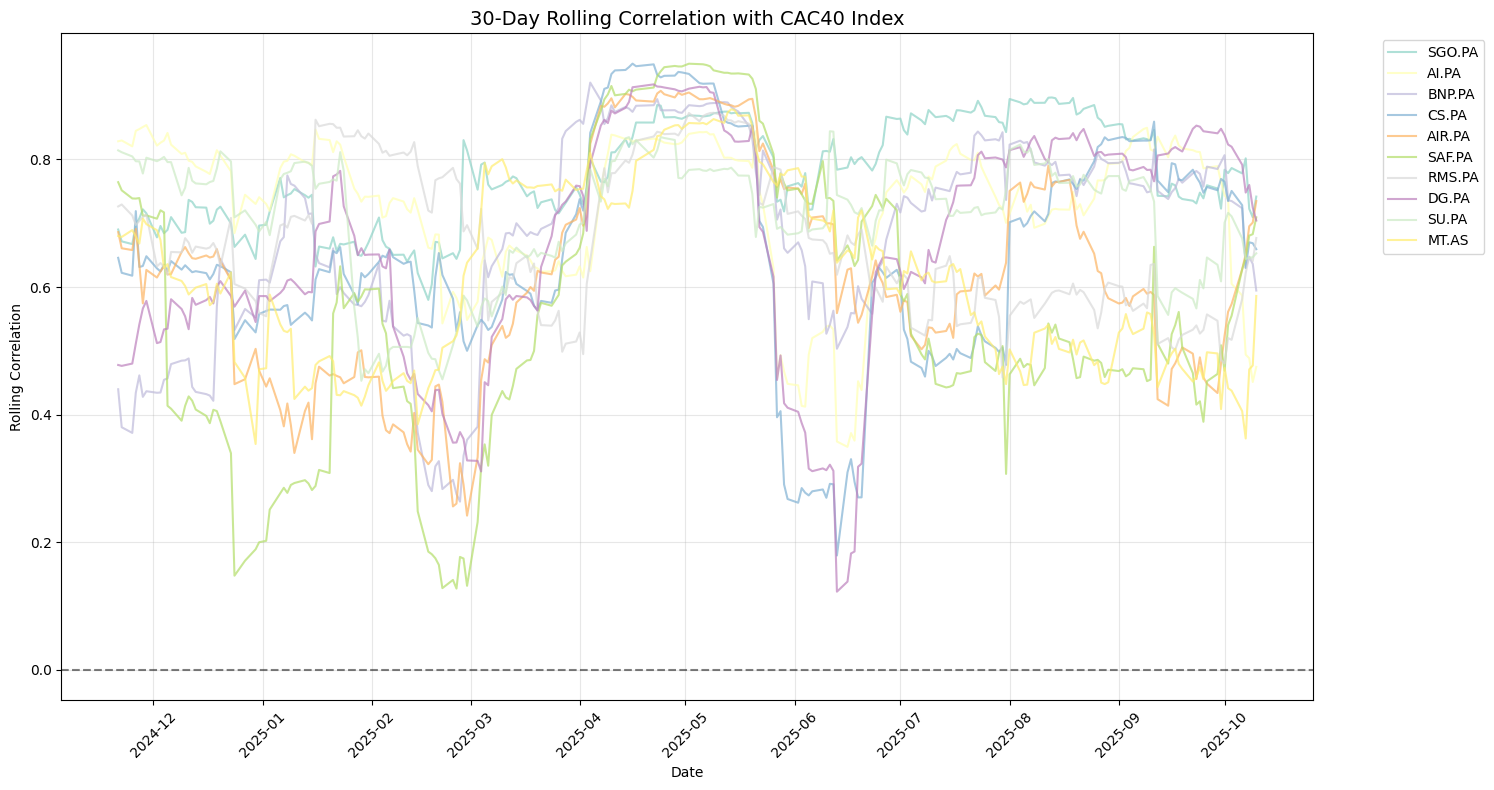


=== SUMMARY STATISTICS ===
 Stock  R² Score  Mean Return (%)  Std Return (%)  Sharpe Ratio  Correlation with CAC40
SGO.PA    0.6008           0.0538          2.0452        0.0263                  0.7751
 AI.PA    0.5463           0.0124          1.1248        0.0110                  0.7391
BNP.PA    0.5250           0.1296          1.6855        0.0769                  0.7246
 CS.PA    0.5144           0.0794          1.3631        0.0583                  0.7172
AIR.PA    0.4968           0.2036          1.7637        0.1155                  0.7048
SAF.PA    0.4791           0.1721          1.7095        0.1007                  0.6922
RMS.PA    0.4754           0.0019          1.6075        0.0012                  0.6895
 DG.PA    0.4705           0.0589          1.2808        0.0460                  0.6860
 SU.PA    0.4660           0.0405          2.1709        0.0187                  0.6827
 MT.AS    0.4032           0.1767          2.4100        0.0733                  0.6350


In [25]:
fig, ax = plt.subplots(figsize=(15, 8))

# Calculate 30-day rolling correlation for each stock with CAC40
window = 30
for i, stock in enumerate(top_10_stocks):
    rolling_corr = top_10_data[stock].rolling(window).corr(top_10_data['CAC40'])
    ax.plot(rolling_corr.index, rolling_corr, 
            linewidth=1.5, color=colors[i], label=stock, alpha=0.7)

ax.set_title(f"{window}-Day Rolling Correlation with CAC40 Index", fontsize=14)
ax.set_ylabel("Rolling Correlation")
ax.set_xlabel("Date")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n=== SUMMARY STATISTICS ===")
summary_stats = []

for stock in top_10_stocks:
    stats = {
        'Stock': stock,
        'R² Score': r2_df[r2_df['stock'] == stock]['r2'].iloc[0],
        'Mean Return (%)': top_10_data[stock].mean(),
        'Std Return (%)': top_10_data[stock].std(),
        'Sharpe Ratio': top_10_data[stock].mean() / top_10_data[stock].std(),
        'Correlation with CAC40': top_10_data[stock].corr(top_10_data['CAC40'])
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df.round(4)
print(summary_df.to_string(index=False))

### Asset Allocation

##### Methodology Overview
The sparse portfolio selection method uses L1-regularization (Lasso) to select a subset of stocks that best track an index while maintaining sparsity. The key idea is to solve an optimization problem that minimizes tracking error while penalizing the number of selected stocks.
##### Mathematical Formulation
For stock selection, we solve:
$$\min_{w} \frac{1}{2} \|R_{index} - R_{stocks} \cdot w\|_2^2 + \lambda \|w\|_1$$
Where:

$R_{index}$ = index returns vector
$R_{stocks}$ = matrix of individual stock returns
$w$ = portfolio weights vector (sparse)
$\lambda$ = regularization parameter controlling sparsity
$\|w\|_1$ = L1 penalty promoting sparsity

In [40]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def sparse_portfolio_selection(value_df, alpha_range=None, cv_folds=5):
    """
    Sparse Portfolio Selection using L1-regularized regression
    
    Parameters:
    -----------
    value_df : pd.DataFrame
        DataFrame with columns: ['name', 'date', 'close', 'daily_return_pct']
    alpha_range : array-like, optional
        Range of alpha values to test
    cv_folds : int, default=5
        Number of cross-validation folds
        
    Returns:
    --------
    results : dict
        Dictionary containing analysis results
    """
    
    # Prepare data
    returns = value_df.pivot(index='date', columns='name', values='daily_return_pct').dropna()
    index_name = 'CAC40'
    index_returns = returns[index_name].values
    stock_names = [col for col in returns.columns if col != index_name]
    stock_returns = returns[stock_names].values
    
    print(f"Data shape: {stock_returns.shape}")
    print(f"Number of stocks: {len(stock_names)}")
    print(f"Number of time periods: {len(index_returns)}")
    
    # Initialize and fit model
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(stock_returns)
    
    tscv = TimeSeriesSplit(n_splits=cv_folds)
    alphas = alpha_range if alpha_range is not None else np.logspace(-4, 1, 50)
    
    model = LassoCV(alphas=alphas, cv=tscv, random_state=42, max_iter=2000)
    model.fit(X_scaled, index_returns)
    
    # Get results
    weights = model.coef_
    selected_stocks = np.where(np.abs(weights) > 1e-6)[0]
    selected_stock_names = [stock_names[i] for i in selected_stocks]
    
    # Calculate metrics
    predicted_returns = model.predict(X_scaled)
    tracking_error = np.sqrt(np.mean((index_returns - predicted_returns)**2))
    r2_score = model.score(X_scaled, index_returns)
    
    # Create weights DataFrame
    weights_df = pd.DataFrame({
        'stock': selected_stock_names,
        'weight': weights[selected_stocks]
    }).sort_values('weight', key=abs, ascending=False)
    
    results = {
        'selected_stocks': selected_stock_names,
        'weights': weights_df,
        'tracking_error': tracking_error,
        'r2_score': r2_score,
        'optimal_alpha': model.alpha_,
        'n_selected': len(selected_stocks),
        'model': model,
        'scaler': scaler,
        'stock_names': stock_names,
        'stock_returns': stock_returns,
        'index_returns': index_returns
    }
    
    return results

def plot_sparse_results(results):
    """
    Plot results of sparse portfolio selection
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Selected stocks weights
    weights_df = results['weights']
    axes[0, 0].bar(range(len(weights_df)), weights_df['weight'])
    axes[0, 0].set_title(f'Selected Stocks Weights (n={len(weights_df)})')
    axes[0, 0].set_xlabel('Stock Index')
    axes[0, 0].set_ylabel('Weight')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Alpha path
    model = results['model']
    axes[0, 1].semilogx(model.alphas_, model.mse_path_.mean(axis=1))
    axes[0, 1].axvline(model.alpha_, color='red', linestyle='--', 
                      label=f'Optimal α = {model.alpha_:.4f}')
    axes[0, 1].set_title('Cross-Validation Score vs Alpha')
    axes[0, 1].set_xlabel('Alpha')
    axes[0, 1].set_ylabel('Mean Squared Error')
    axes[0, 1].legend()
    
    # Plot 3: Number of selected stocks vs alpha
    n_features = []
    alphas = model.alphas_
    for alpha in alphas:
        temp_model = Lasso(alpha=alpha, max_iter=2000)
        temp_model.fit(results['scaler'].transform(results['stock_returns']), results['index_returns'])
        n_features.append(np.sum(np.abs(temp_model.coef_) > 1e-6))
    
    axes[1, 0].semilogx(alphas, n_features)
    axes[1, 0].axvline(model.alpha_, color='red', linestyle='--')
    axes[1, 0].set_title('Number of Selected Stocks vs Alpha')
    axes[1, 0].set_xlabel('Alpha')
    axes[1, 0].set_ylabel('Number of Selected Stocks')
    
    # Plot 4: Summary statistics
    axes[1, 1].text(0.1, 0.8, f"Selected Stocks: {results['n_selected']}", 
                    transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].text(0.1, 0.7, f"R² Score: {results['r2_score']:.4f}", 
                    transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].text(0.1, 0.6, f"Tracking Error: {results['tracking_error']:.4f}", 
                    transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].text(0.1, 0.5, f"Optimal Alpha: {results['optimal_alpha']:.6f}", 
                    transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].set_title('Summary Statistics')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Usage example:
def run_analysis(value_df):
    """
    Run complete sparse selection analysis
    """
    # Run sparse selection
    results = sparse_portfolio_selection(value_df)
    
    # Print results
    print(f"\n=== SPARSE PORTFOLIO SELECTION RESULTS ===")
    print(f"Number of selected stocks: {results['n_selected']}")
    print(f"R² Score: {results['r2_score']:.4f}")
    print(f"Tracking Error: {results['tracking_error']:.4f}")
    print(f"Optimal Alpha: {results['optimal_alpha']:.6f}")
    
    print(f"\nSelected Stocks:")
    for i, (_, row) in enumerate(results['weights'].iterrows(), 1):
        print(f"{i:2d}. {row['stock']:8s} (weight: {row['weight']:8.4f})")
    
    # Plot results
    plot_sparse_results(results)
    
    return results

Data shape: (255, 38)
Number of stocks: 38
Number of time periods: 255

=== SPARSE PORTFOLIO SELECTION RESULTS ===
Number of selected stocks: 35
R² Score: 0.9905
Tracking Error: 0.0978
Optimal Alpha: 0.003393

Selected Stocks:
 1. MC.PA    (weight:   0.1855)
 2. SU.PA    (weight:   0.1740)
 3. SAF.PA   (weight:   0.1054)
 4. AIR.PA   (weight:   0.0986)
 5. SAN.PA   (weight:   0.0970)
 6. CS.PA    (weight:   0.0929)
 7. AI.PA    (weight:   0.0759)
 8. BNP.PA   (weight:   0.0752)
 9. EL.PA    (weight:   0.0640)
10. RMS.PA   (weight:   0.0622)
11. OR.PA    (weight:   0.0591)
12. DSY.PA   (weight:   0.0435)
13. STLAP.PA (weight:   0.0417)
14. MT.AS    (weight:   0.0360)
15. ENGI.PA  (weight:   0.0339)
16. DG.PA    (weight:   0.0335)
17. LR.PA    (weight:   0.0333)
18. CAP.PA   (weight:   0.0331)
19. SGO.PA   (weight:   0.0316)
20. BN.PA    (weight:   0.0294)
21. GLE.PA   (weight:   0.0291)
22. ORA.PA   (weight:   0.0253)
23. VIE.PA   (weight:   0.0250)
24. KER.PA   (weight:   0.0250)
25. S

/Users/thomas.nguyen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/thomas.nguyen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/thomas.nguyen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/thomas.nguyen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/thomas.nguyen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/thomas.nguyen/Library/Python/3.9/lib/python/site-package

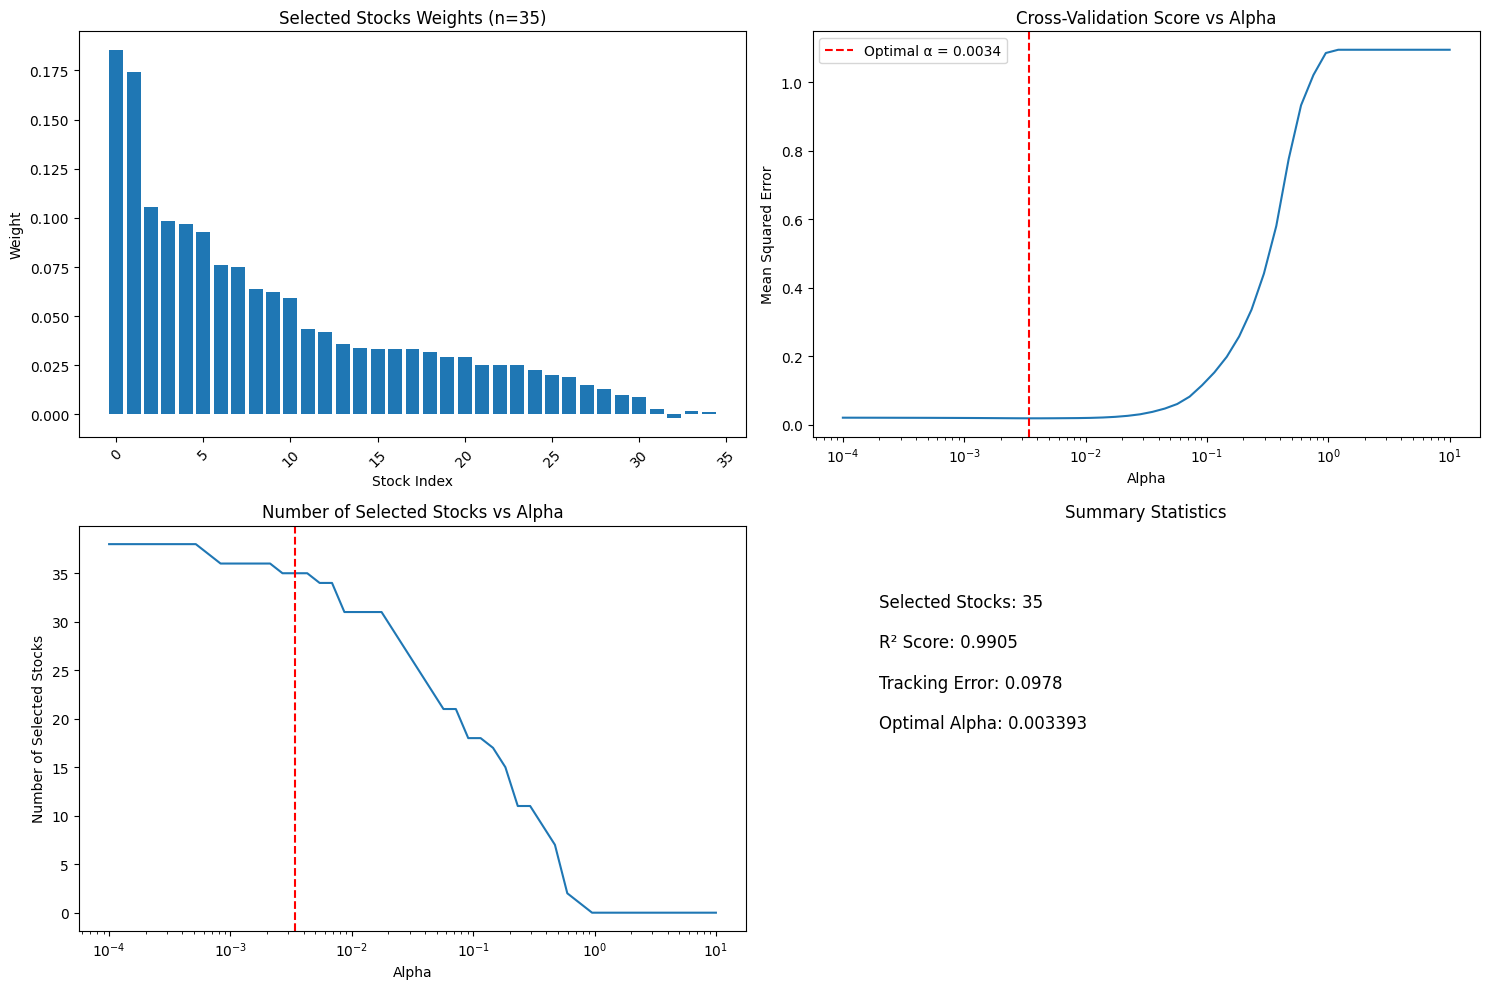

In [41]:
results = run_analysis(value_df)